supervised 
classification

In [361]:
import os
from six.moves import urllib
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.impute import SimpleImputer

In [362]:
DOWNLOAD_ROOT = "http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening"
CREDIT_DATA_URL = DOWNLOAD_ROOT + "/crx.data"
CREDIT_DATA_PATH = "datasets/credit-screening"

In [363]:
# fetch data from its origin
def fetch_credit_crad_data(credit_data_url=CREDIT_DATA_URL, credit_path=CREDIT_DATA_PATH):
    if not os.path.isdir(credit_path):
        os.makedirs(credit_path)
    credit_data_path = os.path.join(credit_path, "crx.data")
    urllib.request.urlretrieve(credit_data_url, credit_data_path)

fetch_credit_crad_data()

In [386]:
# load the dataset to pandas dataframe
def load_credit_card_data(credit_data_path=CREDIT_DATA_PATH):
    csv_path=os.path.join(credit_data_path, "crx.data")
    pd.set_option('display.max_columns', None)
    return pd.read_csv(csv_path, header=None)

credit_card_data = load_credit_card_data()

# get a quick view of the data
credit_card_data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


In [365]:
def get_unique_values(col):
    unique_values = credit_card_data[col].unique()
    unique_values_count = len(credit_card_data[col].unique())
    print (credit_card_data.columns.get_loc(col))
    print (unique_values)
    print(unique_values_count)

for col in credit_card_data:
    get_unique_values(col)
    print('\n')

0
['b' 'a' '?']
3


1
['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' '?' '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50'
 '37.50' '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75'
 '25.42' '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50'
 '47.67' '22.75' '34.42' '28.42' '67.75' '47.42' '36.25' '32.67' '48.58'
 '33.58' '18.83' '26.92' '31.25' 

In [366]:
# change attributes names in order to work with them
# replace '+', '-' with 0 and 1
credit_card_data.columns = ['Male', 'Age', 'Debt', 'Married', 'BankCustomer','EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense','Citizen', 'ZipCode', 'Income', 'Approved']

# handling missing data '?' with NaN, replace values in Approved column with numeric values
credit_card_data = credit_card_data.replace('?', np.nan).replace('+', 1).replace('-', 0)

credit_card_data.tail()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,0
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,0


In [367]:
# use transpose('T') method so all columns can be on the same page
# include all show both object and numeric attributes
credit_card_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Male,678,2,b,468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,678,349,22.67,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Debt,690,NaN,NaN,NaN,4.75872,4.97816,0,1,2.75,7.2075,28
Married,684,3,u,519,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BankCustomer,684,3,g,519,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EducationLevel,681,14,c,137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ethnicity,681,9,v,399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearsEmployed,690,NaN,NaN,NaN,2.22341,3.34651,0,0.165,1,2.625,28.5
PriorDefault,690,2,t,361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employed,690,2,f,395,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [368]:
# describe on the numeric values
credit_card_data.describe(exclude='O').T

,count,mean,std,min,25%,50%,75%,max
Debt,690.0,4.758725,4.978163,0.0,1.000,2.75,7.2075,28.0
YearsEmployed,690.0,2.223406,3.346513,0.0,0.165,1.00,2.6250,28.5
CreditScore,690.0,2.400000,4.862940,0.0,0.000,0.00,3.0000,67.0
Income,690.0,1017.385507,5210.102598,0.0,0.000,5.00,395.5000,100000.0
Approved,690.0,0.444928,0.497318,0.0,0.000,0.00,1.0000,1.0


In [369]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Male              678 non-null object
Age               678 non-null object
Debt              690 non-null float64
Married           684 non-null object
BankCustomer      684 non-null object
EducationLevel    681 non-null object
Ethnicity         681 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null object
Employed          690 non-null object
CreditScore       690 non-null int64
DriversLicense    690 non-null object
Citizen           690 non-null object
ZipCode           677 non-null object
Income            690 non-null int64
Approved          690 non-null int64
dtypes: float64(2), int64(3), object(11)
memory usage: 86.3+ KB


In [370]:
# as seen in info method, age is a data type of object, by using astype method can it be changed to float 
# ----------------------------------------------------------------------------------------------------------------------

# credit_card_data['Age'] = credit_card_data.Age.astype(float)

In [371]:
credit_card_data['Approved'].value_counts()

0    383
1    307
Name: Approved, dtype: int64

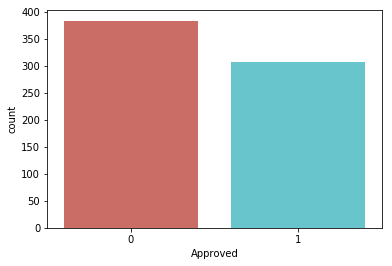

<Figure size 432x288 with 0 Axes>

In [372]:
# examine the values in the 'approved' attribute, it is really unneccessary to make a plot 
# but just for using the sns methods I did it
# ----------------------------------------------------------------------------------------------------------------------

sns.countplot(x='Approved', data=credit_card_data, palette='hls')
plt.show()
plt.savefig('count_approved')

In [373]:
credit_card_data.isna().sum()

Male              12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

In [374]:
# use mean value to fill all NaN
# the reason for fill missing data is due to the fact that lots of algorithms won't perform so well with missing data
# below is to handling numeric missing data
# ---------------------------------------------------------------------------------------------------------------------

# credit_card_data.fillna(credit_card_data.mean(), inplace=True)
# credit_card_data.info()

In [375]:
# an feature with more than 100 different values is called high cardinality, this can affect the performance of a model
# one way to deal with this is to drop the columns
# ---------------------------------------------------------------------------------------------------------------------

# max_cardinality = 100
# high_cardinality = [col for col in credit_card_data.select_dtypes(exclude=np.number)
#                   if len(credit_card_data[col].unique()) > max_cardinality]
# credit_card_data = credit_card_data.drop(columns=high_cardinality)
# credit_card_data.info()

In [377]:
# value_counts method returns a Series containing counts of unique values.
# filling object missing data by using value_counts
# ---------------------------------------------------------------------------------------------------------------------

for col in credit_card_data:
    if credit_card_data[col].dtype == 'object':
        credit_card_data = credit_card_data.fillna(credit_card_data[col].value_counts().index[0])

In [378]:
# verify if null value is filled
# ---------------------------------------------------------------------------------------------------------------------

print (credit_card_data.isna().sum())

Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64


In [385]:
encoder = LabelBinarizer(sparse_output=True)
for col in credit_card_data:
    if credit_card_data[col].dtype == 'object':
        credit_card_data_1hot = encoder.fit_transform(credit_card_data[col])
credit_card_data_1hot = pd.DataFrame(data=credit_card_data_1hot)


ValueError: DataFrame constructor not properly called!

In [355]:
# converting attributes data type from object to numeric values
# ---------------------------------------------------------------------------------------------------------------------

encoder = LabelEncoder()
for col in credit_card_data:
    if credit_card_data[col].dtype == 'object':
        credit_card_data[col] = encoder.fit_transform(credit_card_data[col])

        
for col in credit_card_data:
    get_unique_values(col)
    print('\n')

0
[1 0]
2


1
[156 328  89 125  43 168 179  74 310 255  64 145 220 282 270 211 129  78
  61  34  94 280 121 244   3 274 318 322 252 138 251 291 212  70 119  75
 124 311 188 136 142 234 316 309 243 166 247  84 103 106 215 196 189  79
  77 265 198 261 319 163  80  46 113 203 100  36 171 195 223 264 266  48
 187  59  57 292 123 235 349 213 102 186 289 334 161 303 135 133  69 132
 216 199  29 312 242  40 137  90 184  99 218 305 324  49 236  91 263  81
 279  72 190 131 340 278 206 173 287 182  31 116 159 317 258  67 175 239
 152 306 273 325 214  76 174 341 126 262  95 167 332 241  35 245 315 293
  71 117 107  26  54 321  68 288 237 240 134 178  55 249 191 283 122  85
  92 207 200 344 233 231  87 331 314 308  32 294 339  17  22  39  96 181
 326 108 257 219  47 284 130  30  27 267 238 246  19  23  41 302 296  12
  25 330  21 217 154  28   8  53  18  10 140  60  24 202   6 342 176   9
  65 323   4 164  33  16 183 148 180  97 194 277 228 256 226 335 170 114
 336 155   5  37 172 149 115  11  88 

In [359]:
oneHotEncoder = OneHotEncoder()
for col in credit_card_data:
    credit_card_1hot = oneHotEncoder.fit_transform(credit_card_data[col].values.reshape(-1, 1))
credit_card_1hot.toarray()

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [328]:
#imputer can only work on numeric values
# ---------------------------------------------------------------------------------------------------------------------

# imputer = SimpleImputer(strategy='median')
# credit_card_data_num = credit_card_data.drop('ZipCode', axis=1)
# imputer.fit(credit_card_data)
# X = imputer.transform(credit_card_data)
# credit_card_data_num = pd.DataFrame(X, columns=credit_card_data.columns)
# credit_card_data_num.iloc[272]

Male               1.00
Age               22.00
Debt               6.75
Married            3.00
BankCustomer       3.00
EducationLevel    10.00
Ethnicity          8.00
YearsEmployed      0.04
PriorDefault       0.00
Employed           0.00
CreditScore        0.00
DriversLicense     0.00
Citizen            0.00
ZipCode           44.00
Income             0.00
Approved           0.00
Name: 272, dtype: float64

In [360]:
credit_card_1hot.head()

AttributeError: head not found

In [326]:
# here we can see that all the columns are now in numeric values
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Male              690 non-null int32
Age               690 non-null int32
Debt              690 non-null float64
Married           690 non-null int32
BankCustomer      690 non-null int32
EducationLevel    690 non-null int32
Ethnicity         690 non-null int32
YearsEmployed     690 non-null float64
PriorDefault      690 non-null int32
Employed          690 non-null int32
CreditScore       690 non-null int64
DriversLicense    690 non-null int32
Citizen           690 non-null int32
ZipCode           690 non-null int32
Income            690 non-null int64
Approved          690 non-null int64
dtypes: float64(2), int32(11), int64(3)
memory usage: 56.7 KB


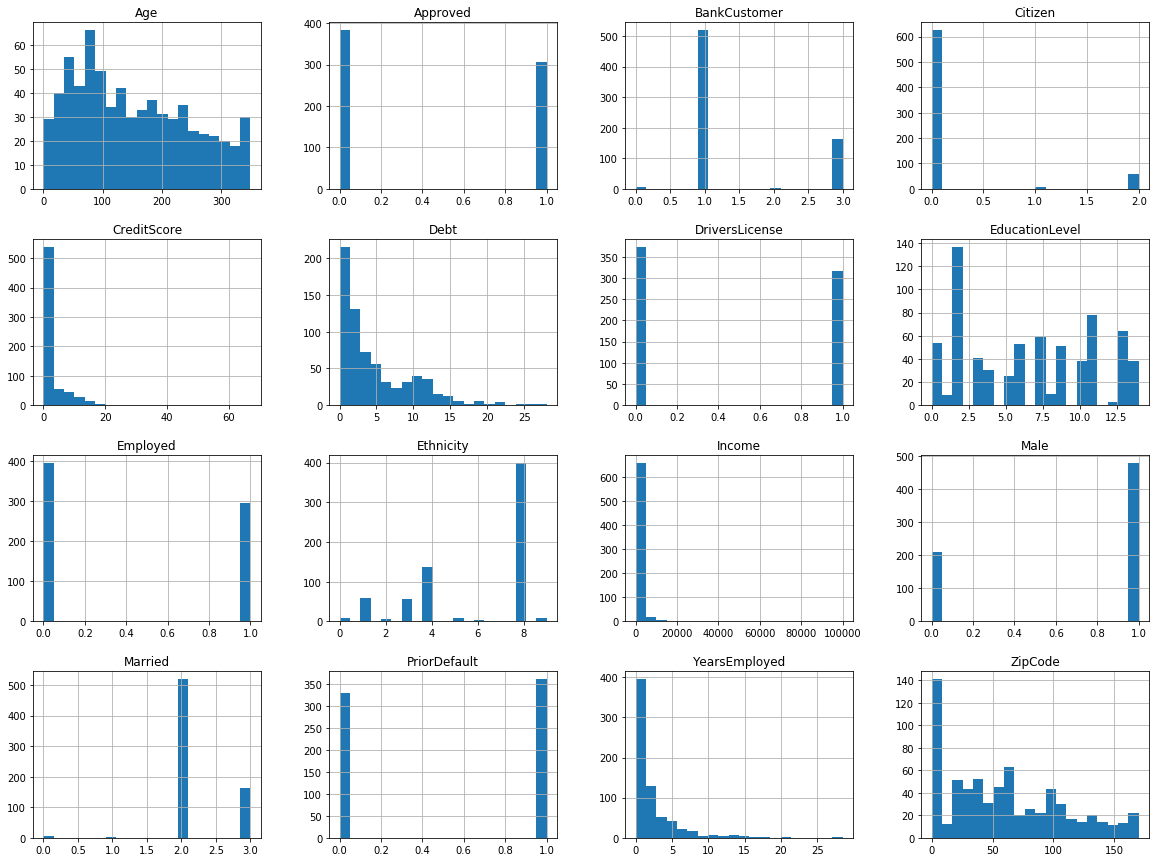

In [334]:
credit_card_data_num.hist(bins=20, figsize=(20, 15))
plt.show()

In [ ]:
# with parameter 'normalize' set to 'True', it returns percentages
credit_card_data['PriorDefault'].value_counts(normalize=True)

In [ ]:
# can also put the result in a variable such as 'corr_matrix'
credit_card_data.corr()

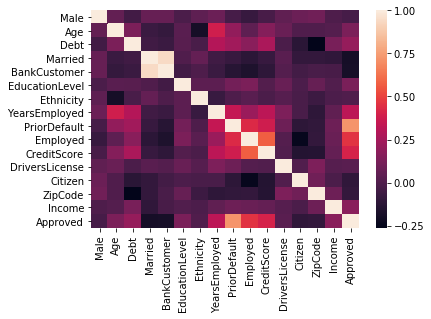

In [333]:
corr = credit_card_data_num.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [335]:
corr['Approved'].sort_values()

Married          -0.191431
BankCustomer     -0.187520
Citizen          -0.100867
ZipCode          -0.094851
Male             -0.028934
Ethnicity         0.000877
DriversLicense    0.031625
EducationLevel    0.130026
Age               0.133304
Income            0.175657
Debt              0.206294
YearsEmployed     0.322475
CreditScore       0.406410
Employed          0.458301
PriorDefault      0.720407
Approved          1.000000
Name: Approved, dtype: float64

In [ ]:
X = credit_card_data.iloc[:, 0:15]
y = credit_card_data.iloc[:, 15]

In [ ]:
y.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)
rescaledX_test

In [ ]:
X_test

In [ ]:
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)

In [ ]:
X_test = standardScaler.transform(X_test)

In [ ]:
X_test

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [ ]:
explained_variance

In [ ]:
X_test

In [ ]:
X_train

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()